<a href="https://colab.research.google.com/github/Vinaysh259/SOLA_Implementation/blob/master/MULTI_LABEL_IMPLEMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))
#printmd('**bold**')

In [0]:
data_path = "content/train_data_binary.csv"

In [8]:
data_raw = pd.read_csv("train_data_binary.csv")
#data_raw = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data_raw.shape

(3371, 12)

In [9]:
print("Number of rows in data =",data_raw.shape[0])
print("Number of columns in data =",data_raw.shape[1])
print("\n")
printmd("**Sample data:**")
data_raw.head()

Number of rows in data = 3371
Number of columns in data = 12




**Sample data:**

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
0,0,0,0,0,0,0,0,0,0,0,1,LOVED THE HAMPTON INN SEAPORT!!!!!!!!!!!!!!!!!!
1,0,0,0,0,0,0,0,0,0,1,0,Just returned from a 3 night stay.
2,0,0,0,0,0,0,0,0,0,0,1,This is a FABULOUS hotel.
3,0,0,0,0,0,0,0,0,1,0,0,"The front desk staff, the doormen, the breakfa..."
4,0,0,0,0,0,0,0,1,0,0,0,The room was fabulous too.


In [10]:
missing_values_check = data_raw.isnull().sum()
print(missing_values_check)

BUILDING       0
VALUE          0
BUSINESS       0
CHECKIN        0
LOCATION       0
FOOD           0
CLEANLINESS    0
ROOMS          0
SERVICE        0
NOTRELATED     0
OTHER          0
SEGMENTS       0
dtype: int64


In [11]:
# Comments with no label are considered to be clean comments.
# Creating seperate column in dataframe to identify clean comments.

# We use axis=1 to count row-wise and axis=0 to count column wise

rowSums = data_raw.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(data_raw))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(data_raw)-clean_comments_count))

Total number of comments =  3371
Number of clean comments =  810
Number of comments with labels = 2561


In [12]:
categories = list(data_raw.columns.values)
categories = categories[:11]
print(categories)

['BUILDING', 'VALUE', 'BUSINESS', 'CHECKIN', 'LOCATION', 'FOOD', 'CLEANLINESS', 'ROOMS', 'SERVICE', 'NOTRELATED', 'OTHER']


In [13]:
# Calculating number of comments in each category

counts = []
for category in categories:
    counts.append((category, data_raw[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

,category,number of comments
0,BUILDING,162
1,VALUE,182
2,BUSINESS,17
3,CHECKIN,96
4,LOCATION,302
5,FOOD,284
6,CLEANLINESS,140
7,ROOMS,531
8,SERVICE,471
9,NOTRELATED,228


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


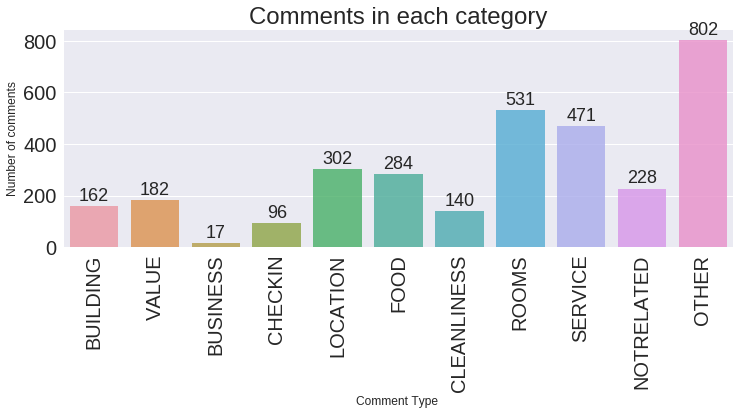

In [14]:
sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax= sns.barplot(categories, data_raw.iloc[:,:11].sum().values,alpha = 0.8)

plt.title("Comments in each category", fontsize=24)
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Comment Type ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = data_raw.iloc[:,:11].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=18)

plt.xticks(rotation=90)
plt.show()



/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


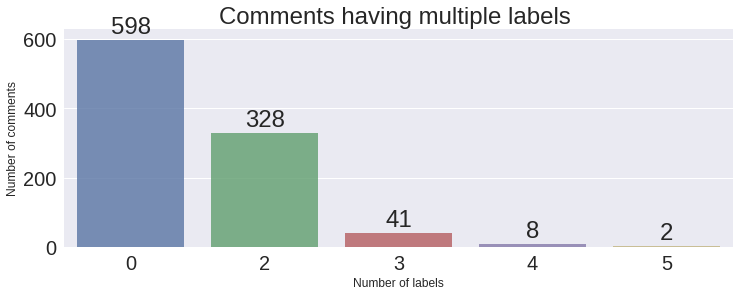

In [15]:
rowSums = data_raw.iloc[:,:11].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[1:]

sns.set(font_scale = 2)
plt.figure(figsize=(12,4))

ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values,alpha = 0.8)

plt.title("Comments having multiple labels ")
plt.ylabel('Number of comments', fontsize=12)
plt.xlabel('Number of labels', fontsize=12)

#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

#plt.xticks(rotation=90)    
plt.show()

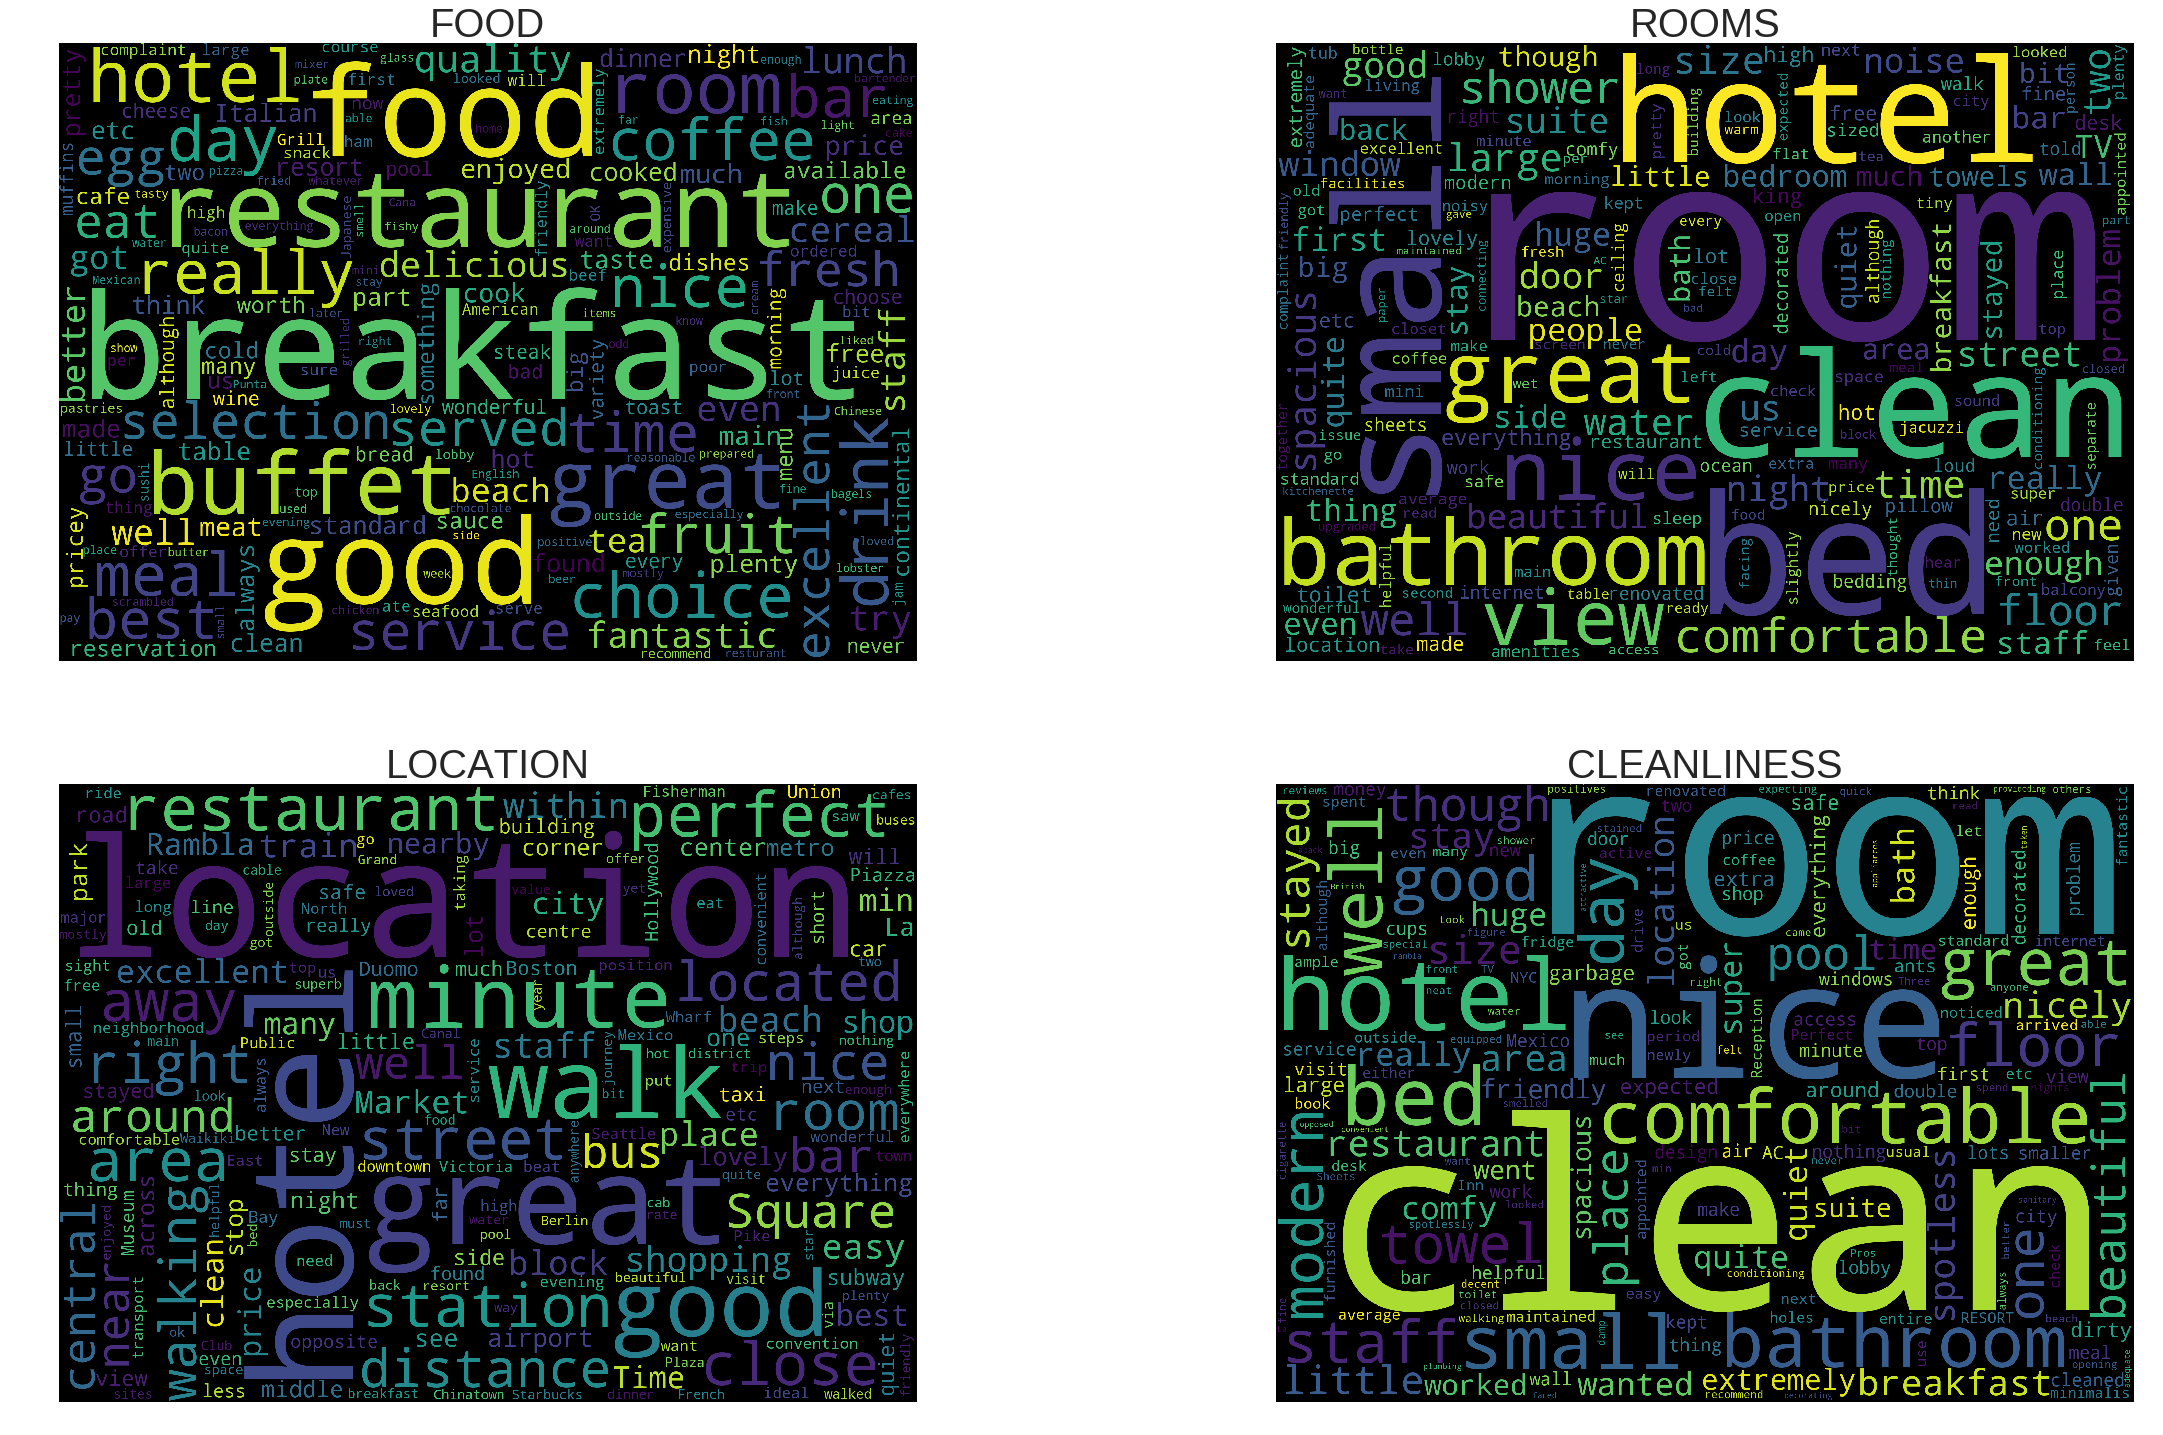

In [16]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))

# FOOD
subset = data_raw[data_raw.FOOD==1]
text = subset.SEGMENTS.values
cloud_FOOD = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 1)
plt.axis('off')
plt.title("FOOD",fontsize=40)
plt.imshow(cloud_FOOD)

# ROOMS
subset = data_raw[data_raw.ROOMS==1]
text = subset.SEGMENTS.values
cloud_ROOMS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 2)
plt.axis('off')
plt.title("ROOMS",fontsize=40)
plt.imshow(cloud_ROOMS)


# LOCATION
subset = data_raw[data_raw.LOCATION==1]
text = subset.SEGMENTS.values
cloud_LOCATION = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 3)
plt.axis('off')
plt.title("LOCATION",fontsize=40)
plt.imshow(cloud_LOCATION)


# CLEANLINESS
subset = data_raw[data_raw.CLEANLINESS==1]
text = subset.SEGMENTS.values
cloud_CLEANLINESS = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))

plt.subplot(2, 2, 4)
plt.axis('off')
plt.title("CLEANLINESS",fontsize=40)
plt.imshow(cloud_CLEANLINESS)


plt.show()



In [22]:
data = data_raw
data = data_raw.loc[np.random.choice(data_raw.index, size=2000)]
data.shape

(2000, 12)

In [0]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [0]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext


def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned


def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

In [27]:
data['SEGMENTS'] = data['SEGMENTS'].str.lower()
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanHtml)
data['SEGMENTS'] = data['SEGMENTS'].apply(cleanPunc)
data['SEGMENTS'] = data['SEGMENTS'].apply(keepAlpha)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
105,0,0,0,0,0,0,0,0,0,1,0,there are plenty of places to eat in the area ...
3314,0,0,0,0,0,1,0,0,0,0,0,but we did not have one bad meal
2078,0,0,0,0,0,0,0,0,0,0,1,we stayed at the palladium grand bavaro
2018,0,0,0,0,1,0,0,0,0,0,0,the beach had numerous palm thatched cabanas
3229,0,0,0,0,0,0,0,0,0,0,1,arrived after a long journey and went to our r...


In [29]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stop_words.update(['zero','one','two','three','four','five','six','seven','eight','nine','ten','may','also','across','among','beside','however','yet','within'])
re_stop_words = re.compile(r"\b(" + "|".join(stop_words) + ")\\W", re.I)
def removeStopWords(sentence):
    global re_stop_words
    return re_stop_words.sub(" ", sentence)

data['SEGMENTS'] = data['SEGMENTS'].apply(removeStopWords)
data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
105,0,0,0,0,0,0,0,0,0,1,0,plenty places eat area around hotel try...
3314,0,0,0,0,0,1,0,0,0,0,0,bad meal
2078,0,0,0,0,0,0,0,0,0,0,1,stayed palladium grand bavaro
2018,0,0,0,0,1,0,0,0,0,0,0,beach numerous palm thatched cabanas
3229,0,0,0,0,0,0,0,0,0,0,1,arrived long journey went room fourth f...


In [30]:
########   STEMMING IS USEFULL??????? ######
stemmer = SnowballStemmer("english")
def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

data['SEGMENTS'] = data['SEGMENTS'].apply(stemming)
data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,BUILDING,VALUE,BUSINESS,CHECKIN,LOCATION,FOOD,CLEANLINESS,ROOMS,SERVICE,NOTRELATED,OTHER,SEGMENTS
105,0,0,0,0,0,0,0,0,0,1,0,plenti place eat area around hotel tri baguett...
3314,0,0,0,0,0,1,0,0,0,0,0,bad meal
2078,0,0,0,0,0,0,0,0,0,0,1,stay palladium grand bavaro
2018,0,0,0,0,1,0,0,0,0,0,0,beach numer palm thatch cabana
3229,0,0,0,0,0,0,0,0,0,0,1,arriv long journey went room fourth floor


In [31]:
############   NOT NEEDED ############

from sklearn.model_selection import train_test_split

train, test = train_test_split(data, random_state=42, test_size=0.30, shuffle=True)

print(train.shape)
print(test.shape)

(1400, 12)
(600, 12)


In [0]:
train_text = train['SEGMENTS']
test_text = test['SEGMENTS']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1,3), norm='l2')
vectorizer.fit(train_text)
vectorizer.fit(test_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents='unicode', sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [40]:
x_train = vectorizer.transform(train_text)
y_train = train.drop(labels = ['SEGMENTS'], axis=1)
x_test = vectorizer.transform(test_text)
y_test = test.drop(labels = ['SEGMENTS'], axis=1)

  (0, 3940)	0.3034138698390048
  (0, 3939)	0.3034138698390048
  (0, 3932)	0.21536365300839205
  (0, 2876)	0.3034138698390048
  (0, 2875)	0.3034138698390048
  (0, 2861)	0.2093215096545528
  (0, 2374)	0.3034138698390048
  (0, 1893)	0.3034138698390048
  (0, 1892)	0.3034138698390048
  (0, 1510)	0.3034138698390048
  (0, 1509)	0.3034138698390048
  (0, 1508)	0.28506703573492054


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier

In [65]:
%%time

# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([
                ('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),
            ])

for category in categories:
    printmd('**Processing {} SEGMENTS...**'.format(category))
    
    # Training logistic regression model on train data
    LogReg_pipeline.fit(x_train, train[category])
    
    # calculating test accuracy
    prediction = LogReg_pipeline.predict(x_test)
    
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))
    
    
    print("\n")
   

**Processing BUILDING SEGMENTS...**

Test accuracy is 0.9483333333333334




**Processing VALUE SEGMENTS...**

Test accuracy is 0.94




**Processing BUSINESS SEGMENTS...**

Test accuracy is 0.9883333333333333




**Processing CHECKIN SEGMENTS...**

Test accuracy is 0.9566666666666667




**Processing LOCATION SEGMENTS...**

Test accuracy is 0.9233333333333333




**Processing FOOD SEGMENTS...**

Test accuracy is 0.915




**Processing CLEANLINESS SEGMENTS...**

Test accuracy is 0.9566666666666667




**Processing ROOMS SEGMENTS...**

Test accuracy is 0.85




**Processing SERVICE SEGMENTS...**

Test accuracy is 0.8616666666666667




**Processing NOTRELATED SEGMENTS...**

Test accuracy is 0.9166666666666666




**Processing OTHER SEGMENTS...**

Test accuracy is 0.78


CPU times: user 122 ms, sys: 20.5 ms, total: 142 ms
Wall time: 333 ms


In [66]:
%%time

!pip install scikit-multilearn
# using binary relevance
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# initialize binary relevance multi-label classifier
# with a gaussian naive bayes base classifier
classifier = BinaryRelevance(GaussianNB())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)
print(y_test.shape)
print(predictions.shape)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
report = classification_report(y_test, predictions)
print(report)

(600, 11)
(600, 11)
Accuracy =  0.455


              precision    recall  f1-score   support

           0       0.38      0.58      0.46        31
           1       0.36      0.44      0.40        36
           2       0.14      0.29      0.19         7
           3       0.45      0.38      0.42        26
           4       0.50      0.56      0.53        48
           5       0.41      0.45      0.43        51
           6       0.27      0.30      0.28        27
           7       0.45      0.60      0.52        91
           8       0.38      0.51      0.43        85
           9       0.35      0.44      0.39        50
          10       0.51      0.68      0.59       145

   micro avg       0.42      0.54      0.48       597
   macro avg       0.38      0.48      0.42       597
weighted avg       0.43      0.54      0.48       597
 samples avg       0.43      0.48      0.43       597

CPU times: user 3.79 s, sys: 188 ms, total: 3.98 s
Wall time: 8.72 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression

In [0]:
%%time

# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())

# Training logistic regression model on train data
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")

Accuracy =  0.29


Wall time: 2.71 s


In [0]:
#USING LABEL POWER SET
from skmultilearn.problem_transform import LabelPowerset

In [70]:
%%time

# initialize label powerset multi-label classifier
classifier = LabelPowerset(LogisticRegression())

# train
classifier.fit(x_train, y_train)

# predict
predictions = classifier.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions))
print("\n")
report = classification_report(y_test, predictions)
print(report)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy =  0.42


              precision    recall  f1-score   support

           0       1.00      0.03      0.06        31
           1       1.00      0.03      0.05        36
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00        26
           4       1.00      0.35      0.52        48
           5       1.00      0.29      0.45        51
           6       0.00      0.00      0.00        27
           7       0.83      0.60      0.70        91
           8       0.93      0.31      0.46        85
           9       1.00      0.04      0.08        50
          10       0.37      0.81      0.51       145

   micro avg       0.52      0.39      0.45       597
   macro avg       0.65      0.22      0.26       597
weighted avg       0.71      0.39      0.39       597
 samples avg       0.39      0.36      0.37       597

CPU times: user 549 ms, sys: 55.1 ms, total: 604 ms
Wall time: 528 ms


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [0]:
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix

In [72]:
%%time

classifier_new = MLkNN(k=10)

# Note that this classifier can throw up errors when handling sparse matrices.

x_train = lil_matrix(x_train).toarray()
y_train = lil_matrix(y_train).toarray()
x_test = lil_matrix(x_test).toarray()

# train
classifier_new.fit(x_train, y_train)

# predict
predictions_new = classifier_new.predict(x_test)

# accuracy
print("Accuracy = ",accuracy_score(y_test,predictions_new))
print("\n")
report = classification_report(y_test, predictions_new)
print(report)

Accuracy =  0.3


              precision    recall  f1-score   support

           0       0.70      0.23      0.34        31
           1       0.71      0.33      0.45        36
           2       1.00      0.29      0.44         7
           3       1.00      0.27      0.42        26
           4       0.71      0.25      0.37        48
           5       0.67      0.12      0.20        51
           6       1.00      0.19      0.31        27
           7       0.71      0.27      0.40        91
           8       0.55      0.36      0.44        85
           9       1.00      0.04      0.08        50
          10       0.69      0.21      0.33       145

   micro avg       0.68      0.23      0.35       597
   macro avg       0.79      0.23      0.34       597
weighted avg       0.73      0.23      0.34       597
 samples avg       0.19      0.20      0.19       597

CPU times: user 58.4 s, sys: 852 µs, total: 58.4 s
Wall time: 58.4 s


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


In [74]:
infer_sent_model = InferSent()

NameError: ignored